
# Monty Hall problem

## Part 1: Simulate the game

Simulate the Monty Hall problem:
- Simulate three doors, one car, and two goats.
- Simulate three players: the switcher, the conservative, and the newcomer.
- Record who wins.
- Repeat it many times.
- Which player do you want to be?

In [6]:
# Single game, 3 doors, 1 opened by the host

import numpy as np

##########################################################

def doors_opening(N_doors, winning_door, first_choice, doors_to_open):
    # Returns all the doors (by door number, not by index) opened by the host, excluding the winning door and the first contestant choice.
    # If the first choice is the winning door, one random door is left closed.
    # All inputs are integers.

    if (doors_to_open > (N_doors-2)): 
        print('ERROR: at least two doors have to stay closed. Check the total number of doors and the number of doors to be opened.')
        return
    
    all_doors = np.array(range(N_doors)) # Array of indexes for all the doors

    # Creating the mask for the doors to be removed from the host's possible choices: first the winning door, then the players' first choice. 
    doors_to_remove = np.array([winning_door]) 
    if (first_choice != winning_door): doors_to_remove = np.append(doors_to_remove, first_choice)

    # The host can choose between the remaining_doors:
    remaining_doors_mask = ~np.isin(all_doors, doors_to_remove)    # (The tilde is the NOT operator: True becomes False and vice versa)

    doors_opened = np.random.choice(all_doors[remaining_doors_mask], doors_to_open, replace = False)

    # The following doors are still closed:
    closed_doors_mask = ~np.isin(all_doors, doors_opened)
    doors_still_closed = all_doors[closed_doors_mask]
    
    return np.sort(doors_opened), np.sort(doors_still_closed)

###############################################################################

N = 3     # Total number of doors
M = 1     # Number of doors opened by the host

# Initialize the prizes behind each door:
prize = []     

for i in range(N-1):
    prize.append('goat')
prize.append('car')     # Now I have an array with N-1 goats and 1 car

doors = np.random.choice(prize, N, replace = False)     # Randomized prizes behind each door

# The switcher and conservators choose the first door:
first_choice = np.random.randint(0, N)

# Picking the winning door:
winning_door = np.where(doors=='car')[0][0]

# The host opens M=N-2 doors (1 in this case); the contestants can choose between the 2 closed doors remaining:
doors_opened, doors_still_closed = doors_opening(N, winning_door, first_choice, M)

# The contestants choose their respective final doors:
conservator_door = first_choice
switcher_door = np.random.choice(doors_still_closed[~np.isin(doors_still_closed, first_choice)])
newcomer_door = np.random.choice(doors_still_closed, 1)[0]

print('The prizes behind each door are: ')
print(doors)
print('   1\t  2\t 3\n')

print('The winning door is: ' + str(winning_door+1))
print('The players choose the door: ' + str(first_choice+1))
print('The host opens the door: ' + str(doors_opened[0] +1) + '\n')

print('The conservator keeps his door: ' + str(conservator_door+1))
print('The switcher chooses the other door: ' + str(switcher_door+1))
print('The newcomer chooses a door: ' + str(newcomer_door+1) + '\n')

print('And the winner is...')
if(conservator_door == winning_door):
    print('\tConservator WINS!')
    print('\tSwitcher loses...')
else:
    print('\tConservator loses...')
    print('\tSwitcher WINS!')
if(newcomer_door == winning_door):
    print('\tNewcomer WINS!')
else:
    print('\tNewcomer loses...')

The prizes behind each door are: 
['goat' 'goat' 'car']
   1	  2	 3

The winning door is: 3
The players choose the door: 3
The host opens the door: 1

The conservator keeps his door: 3
The switcher chooses the other door: 2
The newcomer chooses a door: 3

And the winner is...
	Conservator WINS!
	Switcher loses...
	Newcomer WINS!


Out of 100000 tries:
The conservator wins the car in 33.2% of the tries
The switcher wins the car in 66.8% of the tries
The newcomer wins the car in 50.0% of the tries


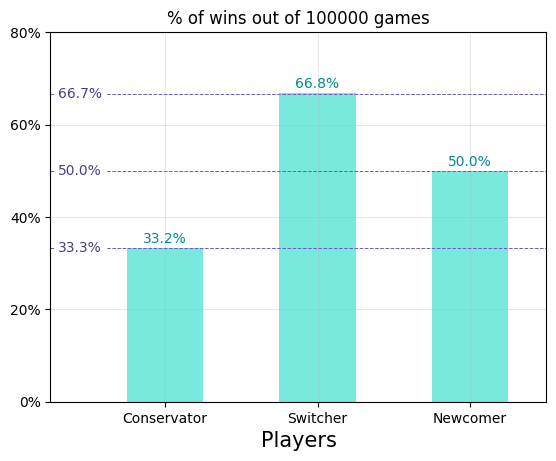

In [7]:
# Repeat the game 

import matplotlib.pyplot as plt

N = 3     # Total number of doors
M = 1     # Number of doors opened by the host
n = 100000     # Number of games

# Initialize the prizes behind each door:
prize = []     

for i in range(N-1):
    prize.append('goat')
prize.append('car')     # Now I have an array with N-1 goats and 1 car

# Initialize the winning counts for the contestants:
conservator_wins = 0
switcher_wins = 0
newcomer_wins = 0

for i in range(n):

    doors = np.random.choice(prize, N, replace = False)     # Randomized prizes behind each door
    
    # The switcher and conservators choose the first door:
    first_choice = np.random.randint(0, N)
    
    # Picking the winning door:
    winning_door = np.where(doors=='car')[0][0]
    
    # The host opens M=N-2 doors (1 in this case); the contestants can choose between the 2 closed doors remaining:
    doors_opened, doors_still_closed = doors_opening(N, winning_door, first_choice, M)
    
    # The contestants choose their respective final doors:
    conservator_door = first_choice
    switcher_door = np.random.choice(doors_still_closed[~np.isin(doors_still_closed, first_choice)])
    newcomer_door = np.random.choice(doors_still_closed, 1)[0]

    # Update the scores:
    if(conservator_door == winning_door):
        conservator_wins += 1
    else:
        switcher_wins += 1
        
    if(newcomer_door == winning_door):
        newcomer_wins += 1

# Results:
print("Out of " + str(n) + " tries:")     
print("The conservator wins the car in " + str(round((conservator_wins*100/n), 1)) + "% of the tries")
print("The switcher wins the car in " + str(round((switcher_wins*100/n), 1)) + "% of the tries")
print("The newcomer wins the car in " + str(round((newcomer_wins*100/n), 1)) + "% of the tries")

# Plotting the win percentage for each contestant:
players = np.array(["Conservator", "Switcher", "Newcomer"])
wins_percentage = np.array([conservator_wins*100/n, switcher_wins*100/n, newcomer_wins*100/n])
expected_percentage = np.array([100/3, 200/3, 100/2])

plt.bar(players, wins_percentage, width=0.5, color='turquoise', alpha=0.7)
plt.grid(alpha=0.3)
plt.yticks([0, 20, 40, 60, 80], ['0%', '20%', '40%', '60%', '80%'])
plt.title('% of wins out of ' + str(n) + ' games')
plt.xlabel('Players', fontsize=15)
plt.xlim(-0.75, len(players) - 0.5)

for i, true_value, exp_value in zip(np.arange(len(wins_percentage)), wins_percentage, expected_percentage):
    # Stamp the true value on each bar:
    plt.text(i, true_value + 0.5, f'{true_value:.1f}%', ha='center', va='bottom', color='darkcyan')
    # Plot the expected value lines and stamps:
    plt.axhline(exp_value, ls='dashed', c='slateblue', linewidth=0.7)
    plt.annotate(str(round(exp_value, 1)) + '%', xy=(-0.75, exp_value), xytext=(-0.7, exp_value), verticalalignment='center', color='darkslateblue', bbox=dict(boxstyle='square', fc='white', edgecolor=(0, 0, 0, 0)))

plt.show()


In [ ]:
# How the probabilities change with respect to the number of games











In [ ]:
# Considerations









## Part 2: 100 doors, 98 opened
What would happen if you had 100 doors to choose from and the presenter opens 98 or them?



## Part 3: N doors, M opened
What if you had $N$ doors to choose from and the presenter opens $M<N-2$ of them? Study how the probability of winning changes as a function of $M$ and $N$.